<a href="https://colab.research.google.com/github/faseeh-quraishi/Credit_Card_Users_Default_Prediction/blob/logistic-regression-branch/MAC_ML_Assignment_Summer2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
pip install ucimlrepo

In [207]:
pip install imbalanced-learn

In [208]:
import pandas as pd
import numpy as np  # Array processing
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Sampling techniques
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Dataset fetching
from ucimlrepo import fetch_ucirepo


In [209]:
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
features = default_of_credit_card_clients.data.features
targets = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)
print("Dataset Id:" + str(default_of_credit_card_clients.metadata.uci_id))
print("Name of Dataset:" + str(default_of_credit_card_clients.metadata.name))
print("Repository URL of Dataset:" + str(default_of_credit_card_clients.metadata.repository_url))
print("Dataset URL:" + str(default_of_credit_card_clients.metadata.data_url))
print("Dataset Abstract:\n" + str(default_of_credit_card_clients.metadata.abstract))
print("Number of dataset instances:" + str(default_of_credit_card_clients.metadata.num_instances))
print("Number of dataset features:" + str(default_of_credit_card_clients.metadata.num_features))


# variable information
# print(default_of_credit_card_clients.variables)

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [210]:
features.columns = default_of_credit_card_clients.variables.description[1:24].tolist()
targets.rename(columns={targets.columns[0]:default_of_credit_card_clients.variables.description[24]},inplace=True)

<ipython-input-210-3855887506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets.rename(columns={targets.columns[0]:default_of_credit_card_clients.variables.description[24]},inplace=True)


In [211]:
mainDataTable = pd.concat([features,targets],axis=1)
mainDataTable

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [212]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [213]:
targets.head()

,default payment next month
0,1
1,1
2,0
3,0
4,0


In [214]:
features.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,50000,1,2,1,46,0,0,0,0,0,...,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [215]:
targets.tail()

,default payment next month
29995,0
29996,0
29997,1
29998,1
29999,1


In [216]:
type(features)

pandas.core.frame.DataFrame

In [217]:
type(targets)

pandas.core.frame.DataFrame

In [218]:
features.ndim

2

In [219]:
targets.ndim

2

In [220]:
features.shape

(30000, 23)

In [221]:
targets.shape

(30000, 1)

In [222]:
features.dtypes

,0
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64


In [223]:
targets.dtypes

,0
default payment next month,int64


In [224]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [225]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [226]:
features.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [227]:
targets.describe()

,default payment next month
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [228]:
features.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [229]:
targets.columns

Index(['default payment next month'], dtype='object')

In [230]:
targets['default payment next month'].nunique()

2

In [231]:
targets['default payment next month'].unique()

array([1, 0])

In [232]:
targets['default payment next month'].value_counts().rename('count'), targets['default payment next month'].value_counts(True).mul(100).rename('Percentage(%)')

(default payment next month
 0    23364
 1     6636
 Name: count, dtype: int64,
 default payment next month
 0    77.88
 1    22.12
 Name: Percentage(%), dtype: float64)

In [233]:
targets.sample(20)

,default payment next month
4233,0
29559,0
9404,0
15434,0
24033,0
1466,1
14398,0
19237,0
27459,0
7803,0


In [234]:
categorical_features = [feature for feature in mainDataTable.columns if mainDataTable[feature].dtype == 'O']
print('categorical features:',categorical_features)

categorical features: []


In [235]:
numerical_features = [feature for feature in mainDataTable.columns if mainDataTable[feature].dtype != 'object']
pd.DataFrame(numerical_features,columns=['Numerical Features'])

,Numerical Features
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


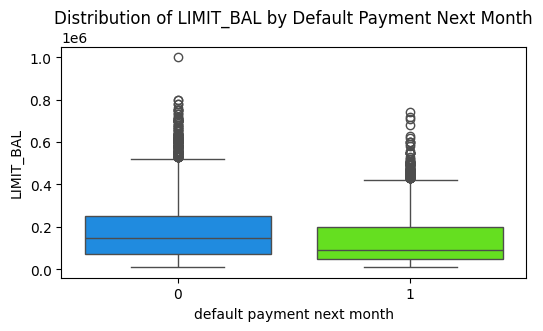

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


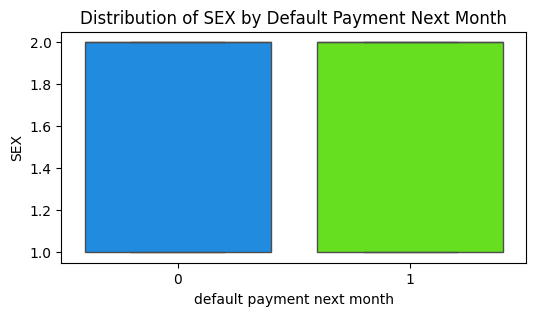

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


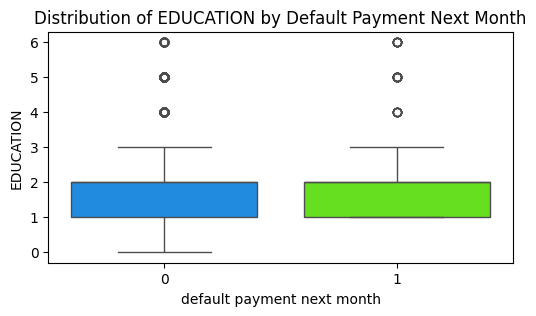

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


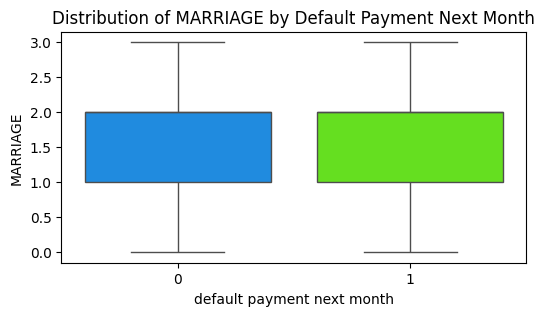

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


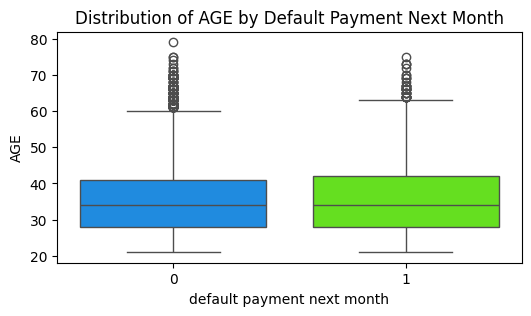

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


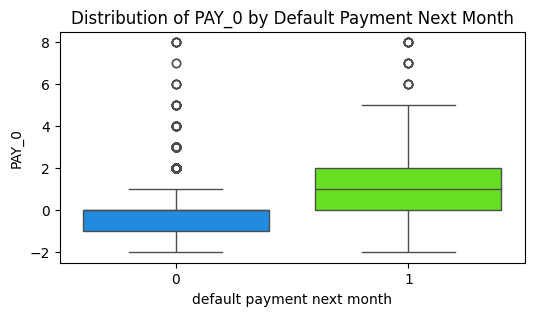

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


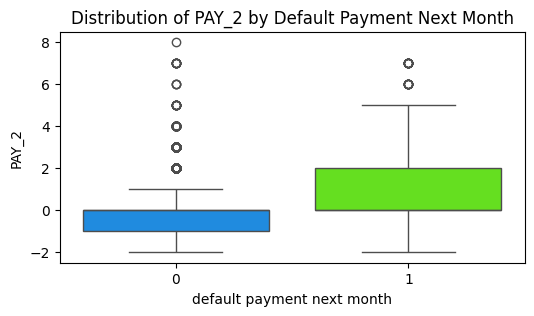

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


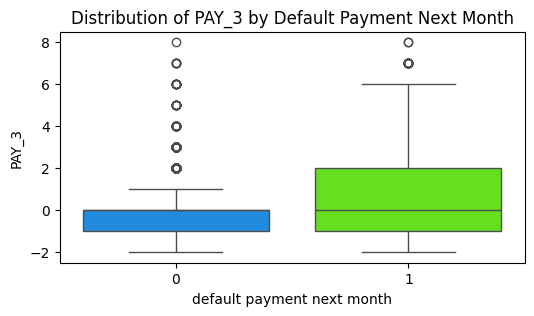

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


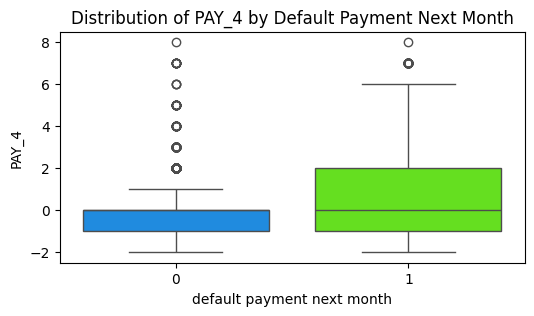

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


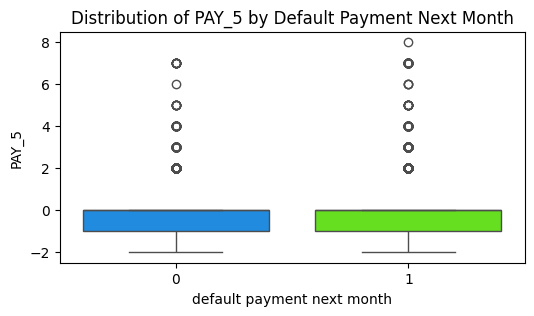

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


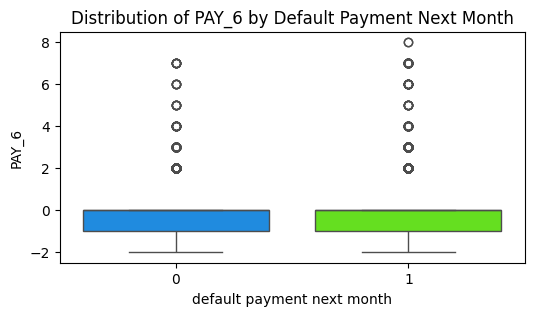

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


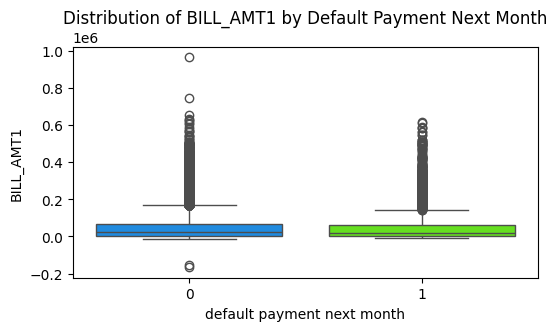

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


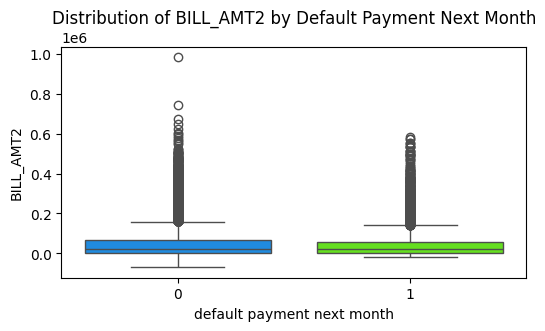

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


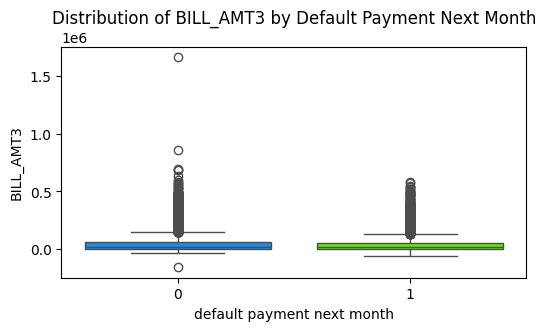

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


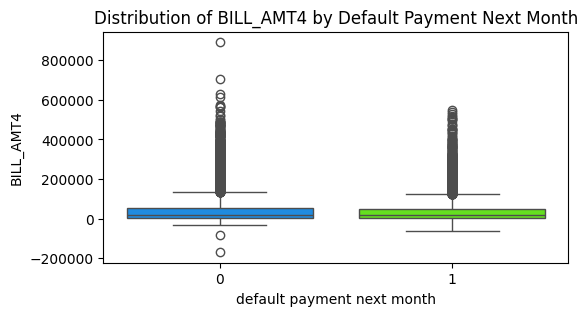

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


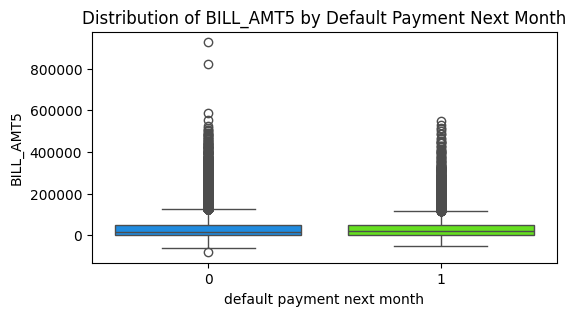

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


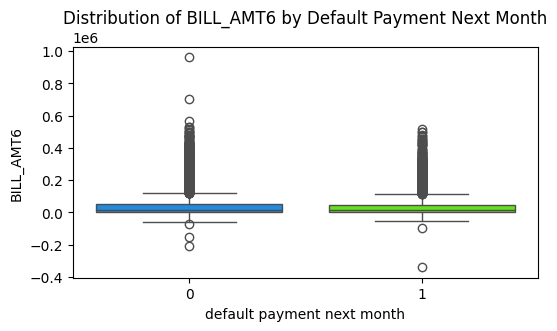

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


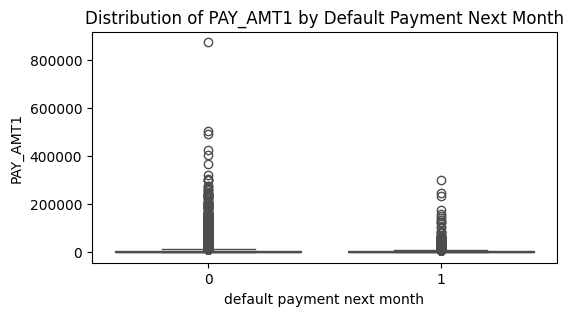

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


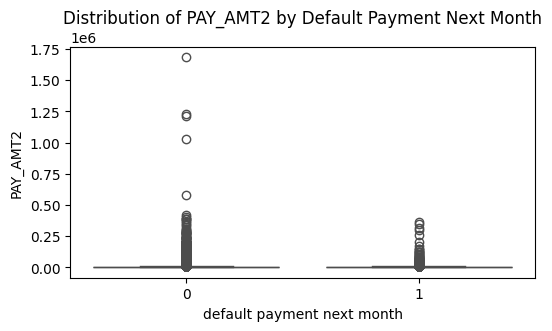

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


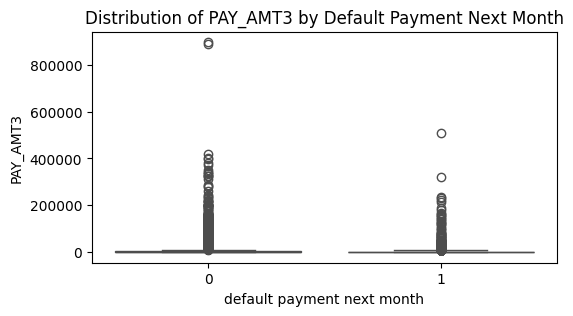

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


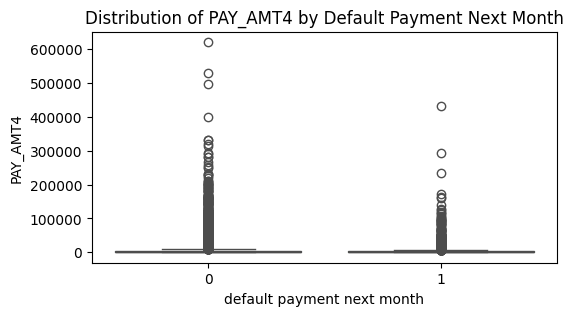

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


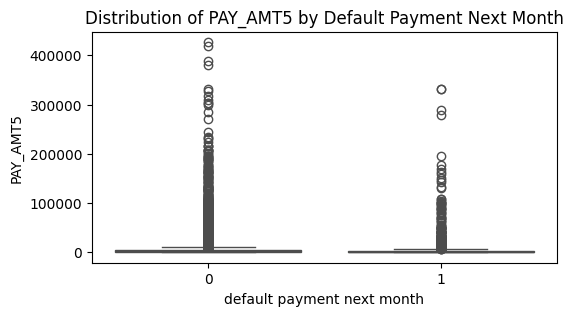

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


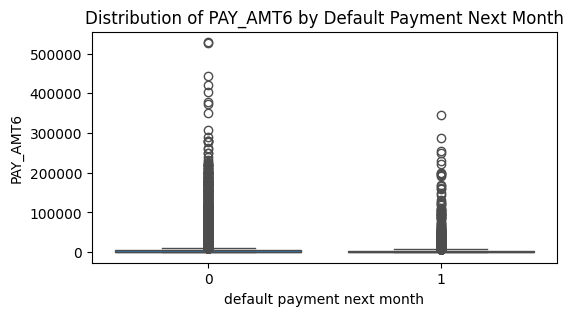

<ipython-input-176-2801978055>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')


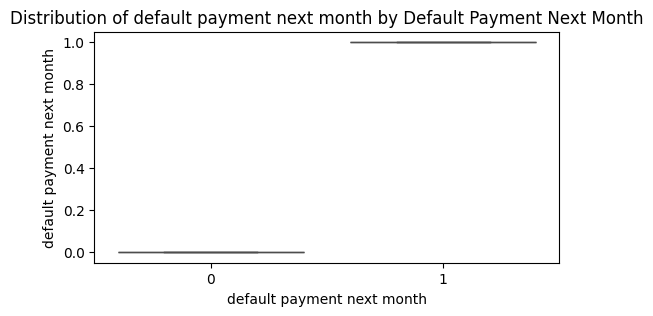

In [176]:
# Visualizing numerical data
for col in numerical_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.boxplot(data=mainDataTable, x='default payment next month', y=col, palette='gist_rainbow_r')
    plt.title(f'Distribution of {col} by Default Payment Next Month')
    plt.show()

In [177]:
mainDataTable.isnull()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
mainDataTable.isnull().any()

,0
LIMIT_BAL,False
SEX,False
EDUCATION,False
MARRIAGE,False
AGE,False
PAY_0,False
PAY_2,False
PAY_3,False
PAY_4,False
PAY_5,False


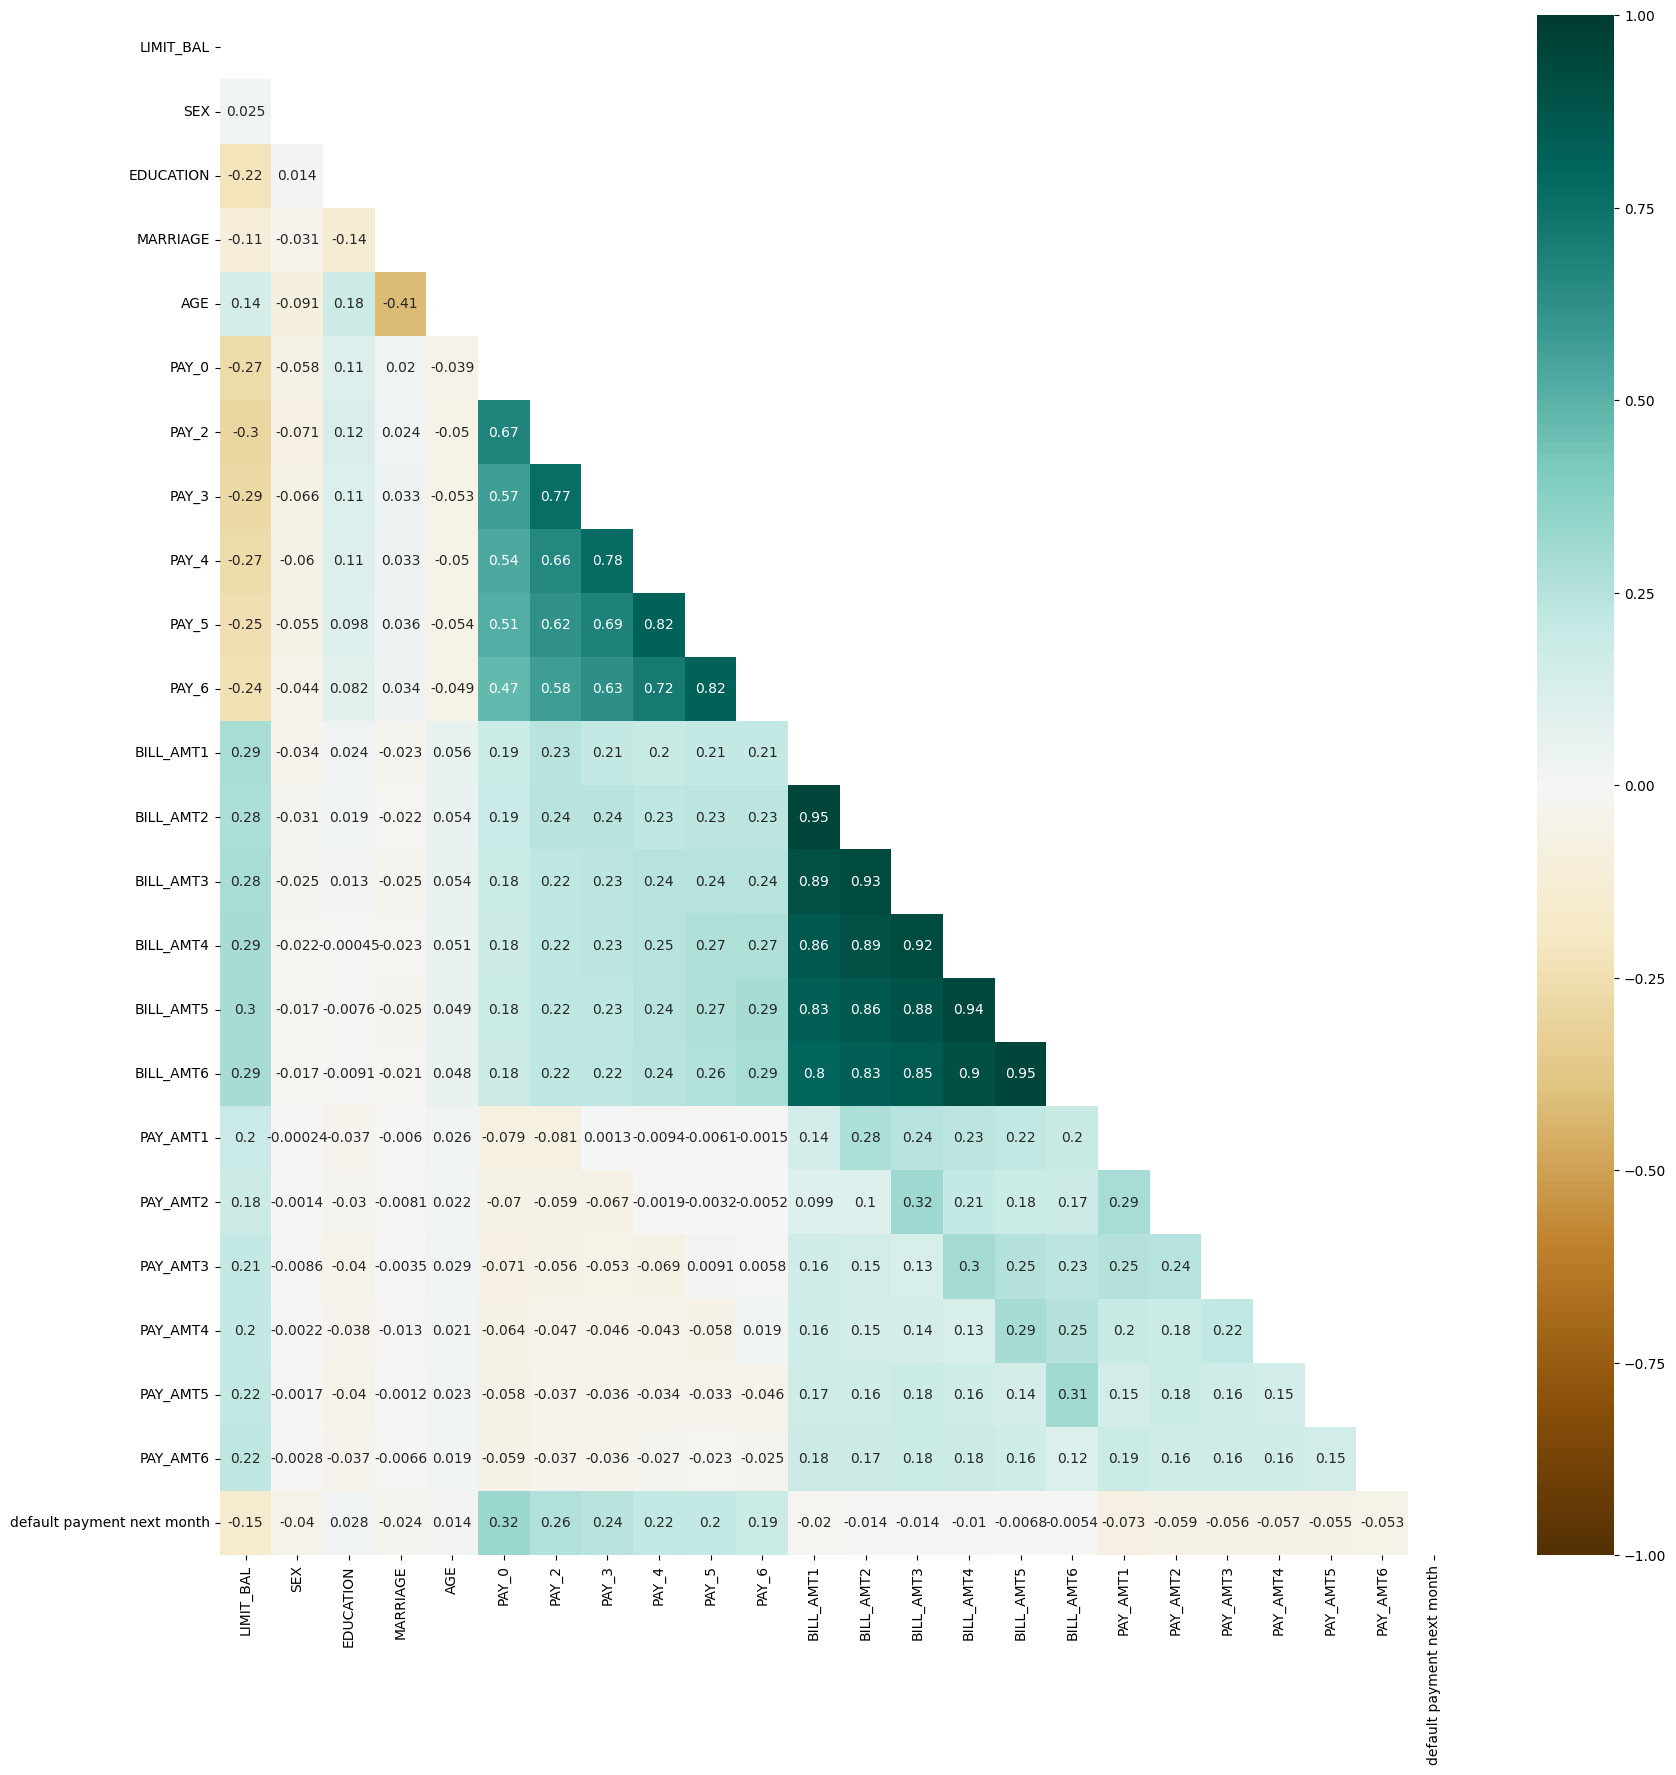

In [179]:
corr = mainDataTable.corr()  # Compute correlation matrix

mask = np.triu(np.ones_like(corr, dtype=bool))  # Upper triangle mask

plt.figure(figsize=(20, 20))  # Set figure size

sns.heatmap(
    corr,
    center=0,
    vmin=-1,
    vmax=1,
    mask=mask,
    annot=True,        # Show correlation values
    cmap='BrBG'        # Diverging colormap
)

plt.show()


In [180]:
print('Missing data sum: ')
mainDataTable.isnull().sum()

Missing data sum: 


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [181]:
print('Missing Data Percentage:')
(mainDataTable.isnull().sum()/mainDataTable.count()).mul(100)

Missing Data Percentage:


,0
LIMIT_BAL,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAY_0,0.0
PAY_2,0.0
PAY_3,0.0
PAY_4,0.0
PAY_5,0.0


In [182]:
print('Before removing duplicates:', mainDataTable.duplicated().sum())

mainDataTable.drop_duplicates(inplace=True)  # Removes duplicate rows in-place

features = mainDataTable[mainDataTable.columns[:-1]]  # All columns except the last as features
targets = mainDataTable[mainDataTable.columns[-1]]    # Last column as the target

print('After removing duplicates:', mainDataTable.duplicated().sum())


Before removing duplicates: 35
After removing duplicates: 0


In [183]:
features.shape,targets.shape


((29965, 23), (29965,))

Text(0.5, 0, 'Default Status')

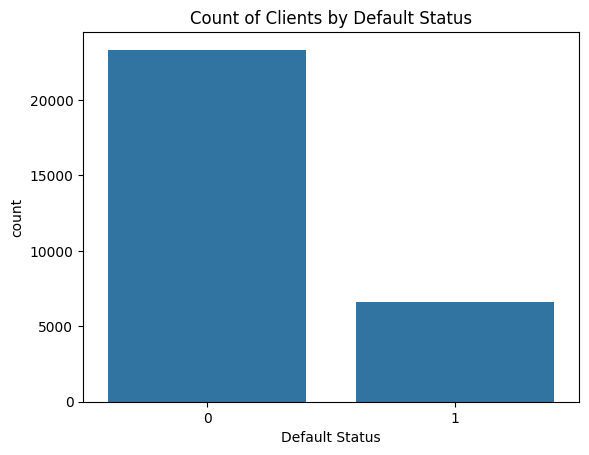

In [184]:
sns.countplot(data = mainDataTable, x = 'default payment next month')
plt.title('Count of Clients by Default Status')
plt.xlabel('Default Status')

In [185]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features) # Standarization

In [186]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled,targets, test_size=0.3, random_state = 7, stratify = targets)


In [187]:
# Check original distribution
counter = Counter(y_train.values.ravel())
print("Original class distribution:", counter)

# Get average class count
avg_count = int(np.mean(list(counter.values())))

# Separate majority and minority classes
majority_class = max(counter, key=counter.get)
minority_class = min(counter, key=counter.get)

# Step 1: Undersample majority class to avg_count
rus = RandomUnderSampler(sampling_strategy={majority_class: avg_count}, random_state=42)
X_temp, y_temp = rus.fit_resample(X_train, y_train)

# Step 2: Oversample minority class to avg_count
ros = RandomOverSampler(sampling_strategy={minority_class: avg_count}, random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_temp, y_temp)

# Check new distribution
print("Balanced class distribution:", Counter(y_balanced.ravel()))

Original class distribution: Counter({np.int64(0): 16334, np.int64(1): 4641})
Balanced class distribution: Counter({np.int64(0): 10487, np.int64(1): 10487})


<ipython-input-187-3286469688>:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print("Balanced class distribution:", Counter(y_balanced.ravel()))


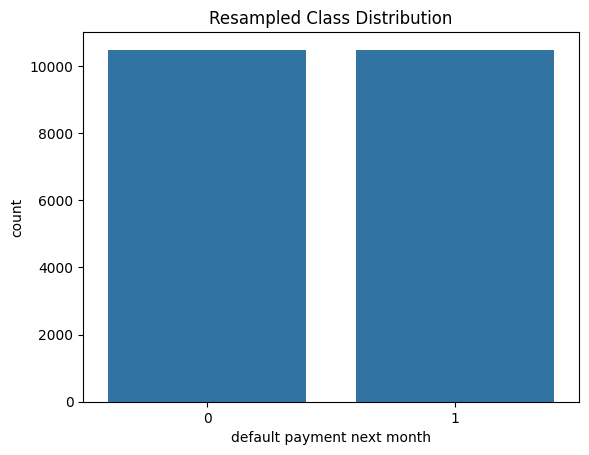

In [188]:
sns.countplot(x=y_balanced)
plt.title("Resampled Class Distribution")
plt.show()

In [189]:
model_DTCa = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model_DTCa.fit(X_balanced, y_balanced)

model_DTCa_prediction = model_DTCa.predict(X_test)

model_DTCa_TestAccuracy = model_DTCa.score(X_test, y_test)
model_DTCa_TrainingAccuracy = model_DTCa.score(X_balanced, y_balanced)

print('Testing Accuracy =',str(model_DTCa_TestAccuracy*100),'\nTraining Accuracy =',str(model_DTCa_TrainingAccuracy*100))

Testing Accuracy = 71.60177975528364 
Training Accuracy = 71.15953084771623


In [190]:
# Evaluation Metrics
acc = accuracy_score(y_test, model_DTCa_prediction)
prec = precision_score(y_test, model_DTCa_prediction)
rec = recall_score(y_test, model_DTCa_prediction)
f1 = f1_score(y_test, model_DTCa_prediction)
cm = confusion_matrix(y_test, model_DTCa_prediction)

# Output results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, model_DTCa_prediction, target_names=["Negative", "Positive"]))


Accuracy: 0.7160177975528365
Precision: 0.41433778857837184
Recall: 0.685771744595274
F1 Score: 0.5165688316606704
Confusion Matrix:
 [[5073 1928]
 [ 625 1364]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.72      0.80      7001
    Positive       0.41      0.69      0.52      1989

    accuracy                           0.72      8990
   macro avg       0.65      0.71      0.66      8990
weighted avg       0.79      0.72      0.74      8990



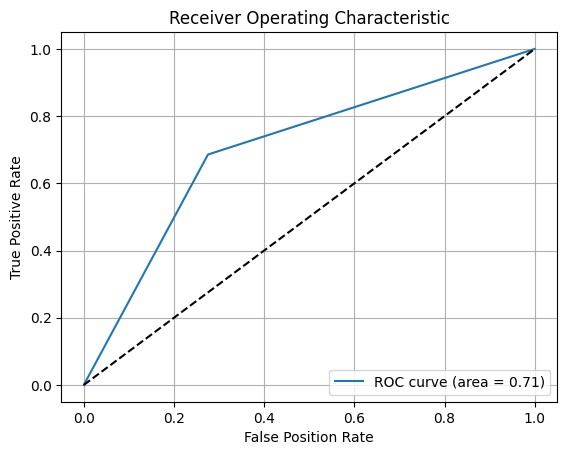

In [236]:
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, model_DTCa_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [191]:
model_DTCb = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state=42
)

model_DTCb.fit(X_balanced, y_balanced)

model_DTCb_prediction = model_DTCb.predict(X_test)

model_DTCb_TestAccuracy = model_DTCb.score(X_test, y_test)
model_DTCb_TrainingAccuracy = model_DTCb.score(X_balanced, y_balanced)

print('Testing Accuracy =',str(model_DTCb_TestAccuracy*100),'\nTraining Accuracy =',str(model_DTCb_TrainingAccuracy*100))

Testing Accuracy = 75.45050055617352 
Training Accuracy = 72.80919233336512


In [192]:
# Evaluation Metrics
acc = accuracy_score(y_test, model_DTCb_prediction)
prec = precision_score(y_test, model_DTCb_prediction)
rec = recall_score(y_test, model_DTCb_prediction)
f1 = f1_score(y_test, model_DTCb_prediction)
cm = confusion_matrix(y_test, model_DTCb_prediction)

# Output results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, model_DTCb_prediction, target_names=["Negative", "Positive"]))

Accuracy: 0.7545050055617353
Precision: 0.4590840840840841
Recall: 0.6148818501759679
F1 Score: 0.5256823554695895
Confusion Matrix:
 [[5560 1441]
 [ 766 1223]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.79      0.83      7001
    Positive       0.46      0.61      0.53      1989

    accuracy                           0.75      8990
   macro avg       0.67      0.70      0.68      8990
weighted avg       0.79      0.75      0.77      8990



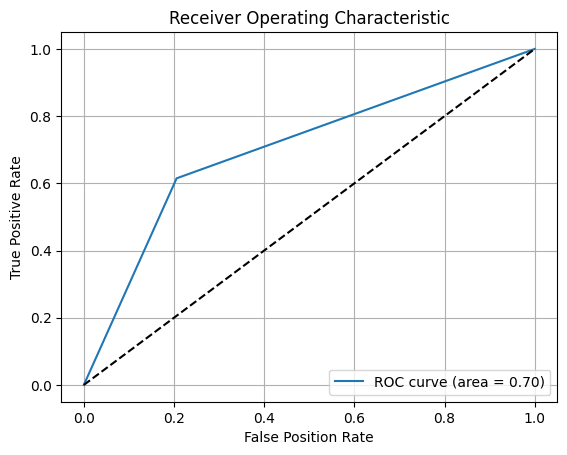

In [237]:
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, model_DTCb_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [193]:
model_DTCc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=42
)

model_DTCc.fit(X_balanced, y_balanced)

model_DTCc_prediction = model_DTCc.predict(X_test)

model_DTCc_TestAccuracy = model_DTCc.score(X_test, y_test)
model_DTCc_TrainingAccuracy = model_DTCc.score(X_balanced, y_balanced)

print('Testing Accuracy =',str(model_DTCc_TestAccuracy*100),'\nTraining Accuracy =',str(model_DTCc_TrainingAccuracy*100))

Testing Accuracy = 75.49499443826474 
Training Accuracy = 76.27062076857061


In [194]:
# Evaluation Metrics
acc = accuracy_score(y_test, model_DTCc_prediction)
prec = precision_score(y_test, model_DTCc_prediction)
rec = recall_score(y_test, model_DTCc_prediction)
f1 = f1_score(y_test, model_DTCc_prediction)
cm = confusion_matrix(y_test, model_DTCc_prediction)

# Output results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, model_DTCc_prediction, target_names=["Negative", "Positive"]))

Accuracy: 0.7549499443826474
Precision: 0.45846273291925466
Recall: 0.5937657114127702
F1 Score: 0.5174151150054764
Confusion Matrix:
 [[5606 1395]
 [ 808 1181]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.80      0.84      7001
    Positive       0.46      0.59      0.52      1989

    accuracy                           0.75      8990
   macro avg       0.67      0.70      0.68      8990
weighted avg       0.78      0.75      0.77      8990



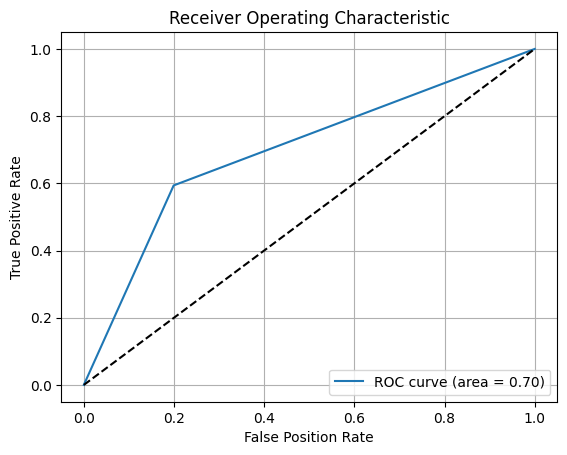

In [238]:
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, model_DTCc_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [195]:
logisticRegressionModel = LogisticRegression(max_iter=2000, random_state=7)
logisticRegressionModel.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000, random_state=7)

In [196]:
y_pred = logisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7001
           1       0.73      0.23      0.35      1989

    accuracy                           0.81      8990
   macro avg       0.77      0.60      0.62      8990
weighted avg       0.80      0.81      0.77      8990



In [197]:
smote = SMOTE(random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_train_resampled.value_counts())

default payment next month
0    16334
1     4641
Name: count, dtype: int64
default payment next month
1    16334
0    16334
Name: count, dtype: int64


In [198]:
logisticRegressionModel = LogisticRegression(max_iter=1000, random_state=7)
logisticRegressionModel.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=7)

In [199]:
y_resampled_pred = logisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_resampled_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      7001
           1       0.38      0.65      0.48      1989

    accuracy                           0.69      8990
   macro avg       0.63      0.67      0.63      8990
weighted avg       0.77      0.69      0.71      8990



In [200]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation F1 score:", grid.best_score_)

Best parameters: {'C': 0.01}
Best cross-validation F1 score: 0.6673294122845823


In [201]:
param_grid = {'C': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation F1 score:", grid.best_score_)

Best parameters: {'C': 0.01}
Best cross-validation F1 score: 0.6673294122845823


In [202]:
logisticRegressionModel = LogisticRegression(C=0.01, max_iter=1000, random_state=42)
logisticRegressionModel.fit(X_train_resampled, y_train_resampled.values.ravel())

LogisticRegression(C=0.01, max_iter=1000, random_state=42)

In [203]:
y_resampled_pred = logisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_resampled_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7001
           1       0.38      0.65      0.48      1989

    accuracy                           0.69      8990
   macro avg       0.63      0.68      0.63      8990
weighted avg       0.77      0.69      0.71      8990



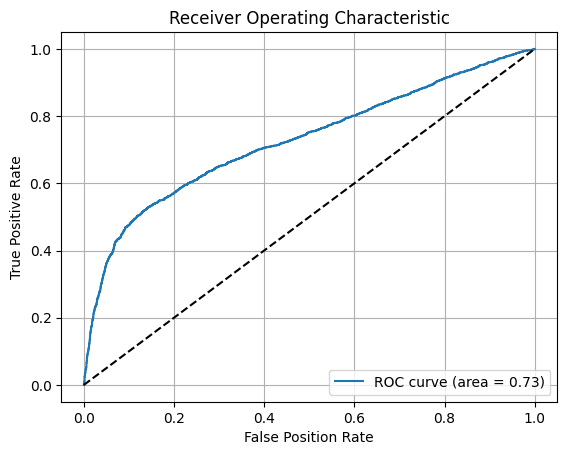

In [204]:
y_scorses = logisticRegressionModel.predict_proba(X_test)[:,1] #Rate of false for every test case
#targets_scorses
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [205]:
fpr, tpr, thresholds = roc_curve(y_test, y_scorses)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.2f}")

y_pred_opt = (y_scorses >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))

trainAccuracy = logisticRegressionModel.score(X_train_resampled, y_train_resampled)
testAccuracy = logisticRegressionModel.score(X_test, y_test)

print('Testing Accuracy =',str(testAccuracy*100),'\nTraining Accuracy =',str(trainAccuracy*100))

Best Threshold: 0.56
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7001
           1       0.51      0.53      0.52      1989

    accuracy                           0.78      8990
   macro avg       0.69      0.69      0.69      8990
weighted avg       0.79      0.78      0.79      8990

Testing Accuracy = 69.19911012235818 
Training Accuracy = 67.39622872535816
